# Distribución Z y T student.

La distribución t student es una distribución similar a la normal (z), que se utiliza en estadística para el cálculo de intervalos de confianza donde se desconoce la desviación estándar poblacional del conjunto a estudiar.

Es aplicable a datos que sabemos que tienden a la distribución normal en sus resultados, generalmente los conjuntos de datos bastante grandes tienden a la normal, por lo que suele ser muy utilizada dentro de este contexto.

Sabemos que ambas funciones son muy similares:

In [638]:
import numpy as np
import matplotlib.pyplot as graph
import scipy.stats as stats
import random 
#Generando un conjunto aleatorio
datos = random.sample(range(1, 300), 100)

#Para Z supongamos que la desviación estándar de la población se define de la siguiente manera
sigma = round(np.std(datos), 4)
print(f'La desviación estándar de la población es {sigma}')

#Teniendo la desviación estándar definida empezamos a trabajar con una muestra de 30 valores
muestra = random.sample(datos, 30)
n = len(muestra)
nivel_confianza = 0.95
media_muestral = round(np.mean(muestra), 4)
print(f'El tamaño de la muestra es: {n} y su media es {media_muestral}')
print(f'El nivel de confianza es {nivel_confianza*100}%')

La desviación estándar de la población es 85.6263
El tamaño de la muestra es: 30 y su media es 150.2333
El nivel de confianza es 95.0%


En la celda anterior ya establecimos los datos para el ejemplo, ahora tocaría trabajar con los datos con la fórmula 9.1

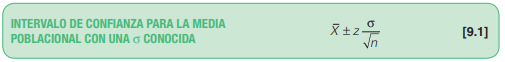

In [639]:
#Formula para calcular los intervalos de confianza.
def intervalo_confianza_z(muestra , confianza, sigma, n_muestras):
    z_alfa_2 = ((1-confianza)/2) + confianza
    z = round(stats.norm.ppf(z_alfa_2), 2)
    error_estandar = round((sigma / n_muestras), 4)
    intervalo = round(z * error_estandar, 4)
    media_muestral = round(np.mean(muestra), 4)
    lim_sup = round(media_muestral + intervalo, 4)
    lim_inf = round(media_muestral - intervalo, 4)
    print(f"El intervalo de confianza es {media_muestral} ± {intervalo}")
    print(f'La media muestral es {media_muestral}')
    print(f'La media poblacional debe estar entre los valores {lim_sup} y {lim_inf}')
    print(f'El valor de Z es {z}')
    return media_muestral, lim_sup, lim_inf, z, intervalo

Este código nos debería servir para aplicar la formula 9.1 a un conjunto de datos que representen una muestra de una población, donde la desviación estándar sea conocida, básicamente se trata de traducir a python la fórmula para que pudiera ser ejectuado por el notebook de python.
Para aplicarlo a nuestro conjunto de datos solo bastaría con llamar a la función ahora.

In [640]:
media_muestral, lim_sup, lim_inf, z, intervalo = intervalo_confianza_z(muestra, nivel_confianza, sigma, n)

El intervalo de confianza es 150.2333 ± 5.5942
La media muestral es 150.2333
La media poblacional debe estar entre los valores 155.8275 y 144.6391
El valor de Z es 1.96


Para la distribución T student, se trabaja con estadísticos aplicados a la muestra, pero la fórmula sería muy similar:

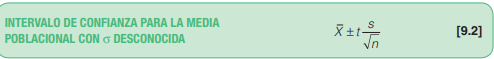

In [641]:
def intervalo_confianza_t(muestra, n_muestras, confianza):
    grados_libertad = n_muestras - 1
    std_muestra = round(np.std(muestra), 4)
    t = round(stats.t.ppf(confianza, grados_libertad), 4)
    media_muestral = round(np.mean(muestra), 4)
    error_estandar = std_muestra / np.sqrt(n_muestras)
    intervalo = round(t * error_estandar, 4)
    lim_sup = round(media_muestral + intervalo, 4)
    lim_inf = round(media_muestral - intervalo, 4)
    print(f"El intervalo de confianza es {media_muestral} ± {intervalo}")
    print(f'La media muestral es {media_muestral}')
    print(f'La media poblacional debe estar entre los valores {lim_sup} y {lim_inf}')
    print(f'El valor de t es {t}')
    return media_muestral, lim_inf, lim_sup, t, intervalo
media_muestral, lim_sup, lim_inf, z, intervalo = intervalo_confianza_t(muestra, n, nivel_confianza)

El intervalo de confianza es 150.2333 ± 30.1182
La media muestral es 150.2333
La media poblacional debe estar entre los valores 180.3515 y 120.1151
El valor de t es 1.6991


Al igual que para el intervalo de confianza con la formula 9.1, para realizar los cálculos solo es necesario traducir la fórmula y calcular las variables para nuestra muestra, sin embargo, siempre tenemos que tener en cuenta que el determinante para usar una función u otra va a ser la existencia de la desviación estándar poblacional o sigma, por lo que podemos clasificar una muestra como aplicable para una formula o no tomando esos parámetros como referencia, siguiendo esta lógica:

In [642]:
class Muestra_sigma:
    def __init__(self, muestra, sigma, confianza):
        self.muestra = muestra
        self.sigma = sigma
        self.confianza = confianza
    
    def intervalo_confianza(self):
        n_muestras = len(self.muestra)
        z_alfa_2 = ((1-self.confianza)/2) + self.confianza
        z = round(stats.norm.ppf(z_alfa_2), 2)
        error_estandar = round((self.sigma / n_muestras), 4)
        intervalo = round(z * error_estandar, 4)
        media_muestral = round(np.mean(self.muestra), 4)
        lim_sup = round(media_muestral + intervalo, 4)
        lim_inf = round(media_muestral - intervalo, 4)
        print(f"El intervalo de confianza es {media_muestral} ± {intervalo}")
        print(f'La media muestral es {media_muestral}')
        print(f'La media poblacional debe estar entre los valores {lim_inf} y {lim_sup}')
        print(f'El valor de Z es {z}')
        return media_muestral, sigma, lim_sup, lim_inf, z, intervalo

class Muestra_s:
    def __init__(self, muestra, confianza):
        self.muestra = muestra
        self.confianza = confianza
        
    def intervalo_confianza(self):
        n_muestras = len(self.muestra)
        grados_libertad = n_muestras - 1
        std_muestra = round(np.std(self.muestra), 4)
        t = round(stats.t.ppf(self.confianza, grados_libertad), 4)
        media_muestral = round(np.mean(self.muestra), 4)
        error_estandar = std_muestra / np.sqrt(n_muestras)
        intervalo = round(t * error_estandar, 4)
        lim_sup = round(media_muestral + intervalo, 4)
        lim_inf = round(media_muestral - intervalo, 4)
        print(f"El intervalo de confianza es {media_muestral} ± {intervalo}")
        print(f'La media muestral es {media_muestral}')
        print(f'La media poblacional debe estar entre los valores {lim_inf} y {lim_sup}')
        print(f'El valor de t es {t}')
        return media_muestral, std_muestra, lim_inf, lim_sup, t, intervalo


def calcular_intervalo_confianza(muestra, confianza, sigma=None):
    if sigma is not None:
        ic = Muestra_sigma(muestra, sigma, confianza)
    else:
        ic = Muestra_s(muestra, confianza)
    return ic.intervalo_confianza()

Ahora solamente se nos requeriría introducir la lista de datos para que el programa haga el resto de calculos:

In [643]:
distribucion_z  = calcular_intervalo_confianza(muestra, nivel_confianza, sigma)
distribucion_t = calcular_intervalo_confianza(muestra, nivel_confianza)

El intervalo de confianza es 150.2333 ± 5.5942
La media muestral es 150.2333
La media poblacional debe estar entre los valores 144.6391 y 155.8275
El valor de Z es 1.96
El intervalo de confianza es 150.2333 ± 30.1182
La media muestral es 150.2333
La media poblacional debe estar entre los valores 120.1151 y 180.3515
El valor de t es 1.6991


De esta forma, podemos observar que lo único que hace considerar un método u otro es la presencia de "sigma". método u otro.

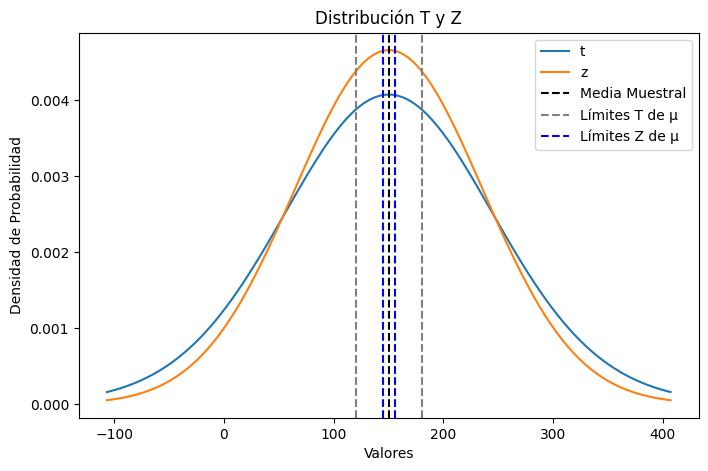

In [644]:
# Graficar ambas distribuciones
x = np.linspace(media_muestral - 3*distribucion_z[1], media_muestral + 3*distribucion_z[1], 100)
fig, ax = graph.subplots(figsize=(8,5))

ax.plot(x, stats.t.pdf(x, n-1, media_muestral, distribucion_t[1]), label='t')
ax.plot(x, stats.norm.pdf(x, media_muestral, distribucion_z[1]), label='z')

ax.axvline(x=distribucion_t[0], color='black', linestyle='--', label="Media Muestral")
ax.axvline(x=distribucion_t[3], color='gray', linestyle='--', label="Límites T de μ")
ax.axvline(x=distribucion_t[2], color='gray', linestyle='--',)
ax.axvline(x=distribucion_z[3], color='blue', linestyle='--', label="Límites Z de μ")
ax.axvline(x=distribucion_z[2], color='blue', linestyle='--',)

# Agregar leyenda y títulos
ax.legend()
ax.set_title('Distribución T y Z')
ax.set_xlabel('Valores')
ax.set_ylabel('Densidad de Probabilidad')

# Mostrar gráfica
graph.show()